<a href="https://colab.research.google.com/github/Sandeshwebdev1999/Sql_project/blob/main/sql_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Name**  -  **Store Data Analysis**

---

##### **Project Type**    - EDA

---

##### **Contribution**    - Individual
##Student Name : **Sandesh Ingle**

---

#### **Define Your Business Objective?**

1. **Maximize revenue by identifying key drivers of sales and profit.**

2. **Improve customer retention and increase lifetime value by identifying high-value customers.**

3. **Optimize shipping methods, improve delivery times, and reduce costs.**

4. **Reduce returns and improve customer satisfaction by understanding why products are returned.**

5. **Identify opportunities for launching new products based on customer preferences and gaps in the market.**


---

# **GitHub Link -**


---

### Import Libraries

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

---


### Dataset Loading

In [2]:
path = '/content/drive/MyDrive/Store.csv'
df = pd.read_csv(path,encoding='unicode_escape')

In [3]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Product_Name,Sales,Quantity,Discount,Profit,Discount_Amount,Years,Customer_Duration,Returned_Items,Return_Reason
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,3.2896,2013,old customer,Not Returned,Not Returned
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Avery 508,11.784,3,0.2,4.2717,2.3568,2013,old customer,Not Returned,Not Returned
2,741,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,54.5472,2013,old customer,Not Returned,Not Returned
3,742,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2.8320,2013,old customer,Not Returned,Not Returned
4,1760,CA-2011-141817,2013-01-05,2013-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,3.9072,2013,old customer,Not Returned,Not Returned


---

#### Let's look at the number of rows and columns in the dataset.

In [4]:
df.shape

(9989, 26)

---

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row_ID             9989 non-null   int64  
 1   Order_ID           9989 non-null   object 
 2   Order_Date         9989 non-null   object 
 3   Ship_Date          9989 non-null   object 
 4   Ship_Mode          9989 non-null   object 
 5   Customer_ID        9989 non-null   object 
 6   Customer_Name      9989 non-null   object 
 7   Segment            9989 non-null   object 
 8   Country            9989 non-null   object 
 9   City               9989 non-null   object 
 10  States             9989 non-null   object 
 11  Postal_Code        9989 non-null   int64  
 12  Region             9989 non-null   object 
 13  Product_ID         9989 non-null   object 
 14  Category           9989 non-null   object 
 15  Sub_Category       9989 non-null   object 
 16  Product_Name       9989 

###**Apps Dataset Columns Descriptions:**

1. **Row_ID** : A unique identifier for each row in the dataset. This is typically used to distinguish between different rows of data.

2. **Order_ID** : A unique identifier for each order placed by a customer.

3. **Order_Date** : The date when the order was placed.

4. **Ship_Date** : The date when the order was shipped to the customer.

5. **Ship_Mode** : The mode of shipment used to deliver the order

6. **Customer_ID** : A unique identifier for each customer who made an order.

7. **Customer_Name** : The name of the customer who made the order.

8. **Segment** : The customer segment

9. **Country** : The country where the customer is located.

10. **City** : The city where the customer resides.

11. **States** : The state or province where the customer resides.

12. **Postal_Code** : The postal code of the customer's address.

13. **Region** : The larger geographic region to which the customer belongs.

14. **Product_ID** : A unique identifier for each product that was sold in the order.

15. **Category** : The broad category of the product.

16. **Sub_Category** : The specific sub-category of the product under the broader category.

17. **Product_Name** : The name of the product purchased in the order.

18. **Sales** : The total sales revenue generated from the order of the specific product.

19. **Quantity** : The quantity of a specific product purchased in the order.

20. **Discount** : The percentage discount applied to the order, if any.

21. **Profit** : The profit made from the sale of the product, calculated as the sales price minus the cost of the product.

22. **Discount_Amount** : The total amount of discount applied to the order. This can be calculated as the Sales multiplied by the Discount rate.

23. **Years** : The year in which the order was placed.

24. **Customer_Duration** : The duration (in years, months, or days) that the customer has been part of the company, indicating how long the customer has been ordering.

25. **Returned_Items** : A flag or indicator showing whether an item was returned.

26. **Return_Reason** : The reason why an item was returned.

---

####Let me show the types of columns.

In [6]:
df.dtypes

,0
Row_ID,int64
Order_ID,object
Order_Date,object
Ship_Date,object
Ship_Mode,object
Customer_ID,object
Customer_Name,object
Segment,object
Country,object
City,object


---

####Let's have a look at missing data in columns.

In [7]:
df.isnull().sum()

,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0


#### There is no missing values we can see.

---

### Creating the database

In [8]:
conn = sqlite3.connect('store.db')
df.to_sql('store', conn, if_exists='replace', index=False)

conn.close()


conn = sqlite3.connect('store.db')
conn.commit()

user = pd.read_sql_query('SELECT * FROM store', conn)


In [9]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Product_Name,Sales,Quantity,Discount,Profit,Discount_Amount,Years,Customer_Duration,Returned_Items,Return_Reason
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,3.2896,2013,old customer,Not Returned,Not Returned
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Avery 508,11.784,3,0.2,4.2717,2.3568,2013,old customer,Not Returned,Not Returned
2,741,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,54.5472,2013,old customer,Not Returned,Not Returned
3,742,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2.8320,2013,old customer,Not Returned,Not Returned
4,1760,CA-2011-141817,2013-01-05,2013-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,3.9072,2013,old customer,Not Returned,Not Returned


In [10]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'States',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Discount_Amount', 'Years', 'Customer_Duration', 'Returned_Items',
       'Return_Reason'],
      dtype='object')

---

#### Return_Reason

In [11]:
pd.read_sql_query('''
                    select Return_Reason, count(Return_Reason) from store
                    where Returned_Items = 'Returned'
                    group by Return_Reason
                    order by count(Return_Reason) desc
                    ''', conn)

,Return_Reason,count(Return_Reason)
0,Product Description Inaccurate,304
1,Customer Dissatified With Product,158
2,Product Arrived After Promised Delivery Date,100
3,Product Damaged,90
4,Product Ordered Accidently,81
5,Incorrect Products Delivered,67


---

#### Focusing on customer behaviour

In [12]:
pd.read_sql_query('''
                    select distinct Customer_Name,Region,Segment,count(Product_Name) as Product_count,Customer_Duration from store
                    group by Customer_Name
                    order by count(Product_Name) desc
                    limit 20

                    ''', conn)

,Customer_Name,Region,Segment,Product_count,Customer_Duration
0,William Brown,West,Consumer,37,old customer
1,Paul Prost,East,Home Office,34,old customer
2,Matt Abelman,Central,Home Office,34,old customer
3,John Lee,West,Consumer,34,old customer
4,Seth Vernon,East,Consumer,32,old customer
5,Jonathan Doherty,West,Corporate,32,old customer
6,Edward Hooks,West,Corporate,32,old customer
7,Chloris Kastensmidt,East,Consumer,32,old customer
8,Zuschuss Carroll,West,Consumer,31,old customer
9,Emily Phan,East,Consumer,31,old customer


In [13]:
pd.read_sql_query('''
                    select Return_Reason, count(Return_Reason), Customer_Duration from store
                    where Returned_Items = 'Returned' and Customer_Duration = 'old customer'
                    group by Return_Reason
                    order by count(Return_Reason) desc
                    ''', conn)

,Return_Reason,count(Return_Reason),Customer_Duration
0,Product Description Inaccurate,302,old customer
1,Customer Dissatified With Product,158,old customer
2,Product Arrived After Promised Delivery Date,100,old customer
3,Product Damaged,90,old customer
4,Product Ordered Accidently,79,old customer
5,Incorrect Products Delivered,67,old customer


##### **Product description is inaccurate, customers are dissatisfied with the product, the product arrived after the promised delivery date, and the product is damaged. These issues are occurring with old customers as well, which is why even old customers are returning the products**

---

#### **Now, we work Region-wise.**

In [14]:
pd.read_sql_query('''
                    select distinct Region,count(Product_Name) from store
                    group by Region
                    order by count(Product_Name) desc
                    ''', conn)


,Region,count(Product_Name)
0,West,3202
1,East,2847
2,Central,2321
3,South,1619


In [15]:
pd.read_sql_query('''
                    select Returned_Items,count(Returned_Items) from store
                    group by Returned_Items
                    ''', conn)

,Returned_Items,count(Returned_Items)
0,Not Returned,9189
1,Returned,800


In [16]:
pd.read_sql_query('''
                    select Region,count(Returned_Items) from store
                    where Returned_Items = 'Returned'
                    group by Returned_Items

                    ''', conn)

,Region,count(Returned_Items)
0,West,800


Text(0.5, 1.0, 'Returned_Items Count by Region')

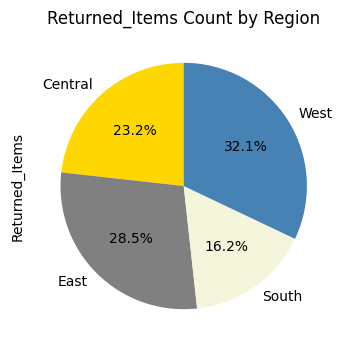

In [17]:
pd.read_sql_query('''

                    select Region, States,count(Returned_Items) from store
                    where Returned_Items = 'Returned'
                    group by Region

''',conn)

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
df.groupby('Region')['Returned_Items'].count().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FFD700','#808080','#F5F5DC','#4682B4'])
plt.title('Returned_Items Count by Region')

---

#### **We try to resolve the Return Item issue.**

In [18]:
pd.read_sql_query('''

                    select distinct Return_Reason,count(Return_Reason) from store
                    where Returned_Items = 'Returned'
                    group by Return_Reason
                    order by count(Return_Reason) desc

''',conn)

,Return_Reason,count(Return_Reason)
0,Product Description Inaccurate,304
1,Customer Dissatified With Product,158
2,Product Arrived After Promised Delivery Date,100
3,Product Damaged,90
4,Product Ordered Accidently,81
5,Incorrect Products Delivered,67


In [19]:
pd.read_sql_query('''
                    select Return_Reason,count(Return_Reason) from store
                    where Returned_Items = 'Returned' and Region = 'Central'
                    group by Return_Reason
                    order by count(Return_Reason) desc
''',conn)

,Return_Reason,count(Return_Reason)
0,Product Description Inaccurate,32
1,Customer Dissatified With Product,22
2,Product Arrived After Promised Delivery Date,16
3,Product Damaged,11
4,Product Ordered Accidently,9
5,Incorrect Products Delivered,2


In [20]:
pd.read_sql_query('''
                    select Return_Reason,count(Return_Reason) from store
                    where Returned_Items = 'Returned' and Region = 'West'
                    group by Return_Reason
                    order by count(Return_Reason) desc
''',conn)

,Return_Reason,count(Return_Reason)
0,Product Description Inaccurate,186
1,Customer Dissatified With Product,108
2,Product Arrived After Promised Delivery Date,70
3,Product Damaged,48
4,Product Ordered Accidently,40
5,Incorrect Products Delivered,38


In [21]:
pd.read_sql_query('''
                    select Return_Reason,count(Return_Reason) from store
                    where Returned_Items = 'Returned' and Region = 'East'
                    group by Return_Reason
                    order by count(Return_Reason) desc
''',conn)

,Return_Reason,count(Return_Reason)
0,Product Description Inaccurate,52
1,Product Damaged,31
2,Customer Dissatified With Product,26
3,Product Ordered Accidently,17
4,Incorrect Products Delivered,13
5,Product Arrived After Promised Delivery Date,10


In [22]:
pd.read_sql_query('''
                    select Return_Reason,count(Return_Reason) from store
                    where Returned_Items = 'Returned' and Region = 'South'
                    group by Return_Reason
                    order by count(Return_Reason) desc
''',conn)

,Return_Reason,count(Return_Reason)
0,Product Description Inaccurate,34
1,Product Ordered Accidently,15
2,Incorrect Products Delivered,14
3,Product Arrived After Promised Delivery Date,4
4,Customer Dissatified With Product,2


In [23]:
pd.read_sql_query('''
                    select States,count(Return_Reason) from store
                    where Returned_Items = 'Returned' and Region = 'South'
                    group by States
                    order by count(Return_Reason) desc

''',conn)

,States,count(Return_Reason)
0,Tennessee,19
1,Florida,11
2,Georgia,10
3,Virginia,9
4,North Carolina,8
5,Mississippi,5
6,Kentucky,4
7,Alabama,2
8,Louisiana,1


**The product is not being delivered properly in the south area. Rechecking is needed before sending the product here**

---

In [24]:
pd.read_sql_query('''
                    select States,count(Return_Reason) from store
                    where Returned_Items = 'Returned' and Region = 'East'
                    group by States
                    order by count(Return_Reason) desc

''',conn)

,States,count(Return_Reason)
0,New York,64
1,Ohio,29
2,Pennsylvania,16
3,Massachusetts,14
4,Delaware,10
5,Maryland,8
6,New Jersey,3
7,New Hampshire,3
8,Rhode Island,2


**In the East region, all products were accidentally ordered.**

---

In [25]:
pd.read_sql_query('''

                    select States,count(Return_Reason) from store
                    where Returned_Items = 'Returned' and Region = 'Central'
                    group by States
                    order by count(Return_Reason) desc


''',conn)

,States,count(Return_Reason)
0,Texas,44
1,Illinois,20
2,Michigan,11
3,Wisconsin,6
4,Oklahoma,4
5,Indiana,3
6,Minnesota,2
7,Nebraska,1
8,Missouri,1


In [26]:
pd.read_sql_query('''
                    select Distinct States,count(Returned_Items) from store
                    where Returned_Items = 'Returned' and Region = 'West'
                    group by States

''',conn)

,States,count(Returned_Items)
0,Arizona,22
1,California,338
2,Colorado,25
3,Idaho,2
4,Montana,2
5,New Mexico,3
6,Oregon,20
7,Utah,12
8,Washington,66


In [27]:
pd.read_sql_query('''
                    select Distinct Region,count(Returned_Items) from store
                    where Returned_Items = 'Returned'
                    group by Returned_Items

''',conn)

,Region,count(Returned_Items)
0,West,800


---

# **Data Visualization**  :

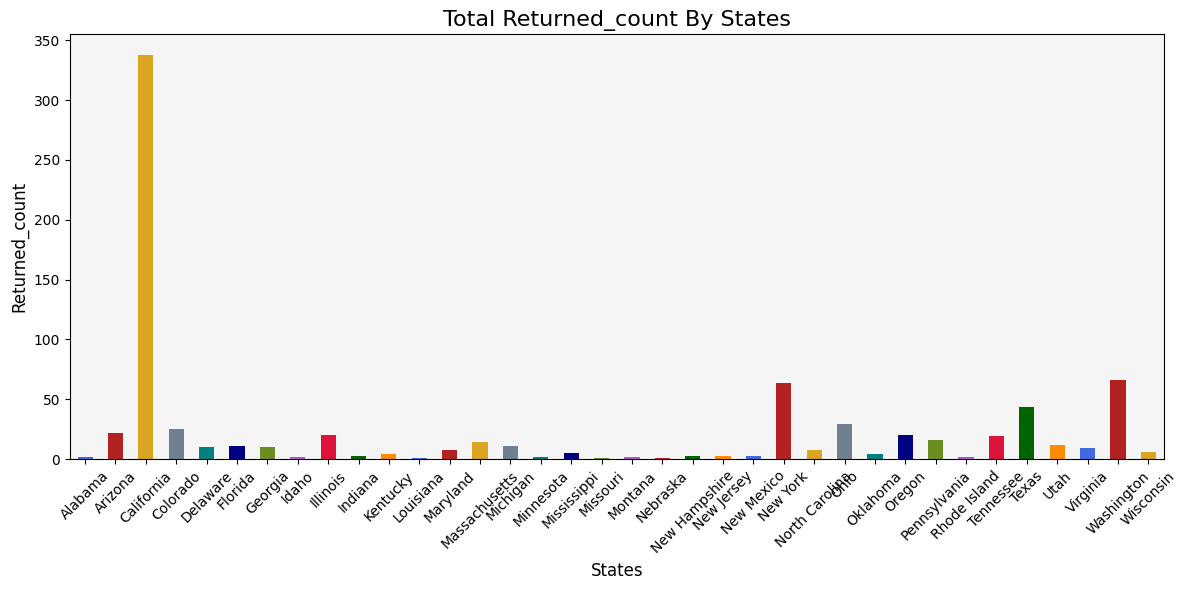

In [28]:
state_count=pd.read_sql_query('''
                    select Distinct States,count(Returned_Items)as Returned_count from store
                    where Returned_Items = 'Returned'
                    group by States

''',conn)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('whitesmoke')
colors = ['#4169E1','#B22222','#DAA520','#708090','#008080','#000080','#6B8E23','#BA55D3','#DC143C','#006400','#FF8C00']
state_count.plot(kind='bar', x='States', y='Returned_count', color=colors, legend=False, ax=plt.gca())
plt.title('Total Returned_count By States', fontsize=16)
plt.xlabel('States', fontsize=12)
plt.ylabel('Returned_count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---

#### Focusing on California

In [29]:
pd.read_sql_query('''
                 SELECT Sub_Category, Return_Reason, States,count(Return_Reason) FROM Store
                 where Returned_Items = 'Returned' and States = 'California'
                 group by Return_Reason
                 order by Sub_Category desc

''',conn)


,Sub_Category,Return_Reason,States,count(Return_Reason)
0,Paper,Product Description Inaccurate,California,128
1,Paper,Product Arrived After Promised Delivery Date,California,50
2,Furnishings,Product Ordered Accidently,California,33
3,Furnishings,Product Damaged,California,37
4,Bookcases,Customer Dissatified With Product,California,63
5,Art,Incorrect Products Delivered,California,27


In [30]:
pd.read_sql_query('''
                 SELECT STRFTIME('%Y-%m', Order_Date) AS Monthly_Return, Sub_Category, Return_Reason,count(Return_Reason) FROM Store
                 where Returned_Items = 'Returned' and States = 'California'
                 group by Monthly_Return
                 order by Monthly_Return desc

''',conn)

,Monthly_Return,Sub_Category,Return_Reason,count(Return_Reason)
0,2016-12,Paper,Product Ordered Accidently,17
1,2016-11,Paper,Product Description Inaccurate,11
2,2016-10,Furnishings,Product Description Inaccurate,21
3,2016-09,Appliances,Product Description Inaccurate,17
4,2016-08,Phones,Product Damaged,28
5,2016-07,Accessories,Product Description Inaccurate,6
6,2016-06,Accessories,Product Damaged,9
7,2016-05,Binders,Product Description Inaccurate,3
8,2016-04,Paper,Product Damaged,10
9,2016-03,Binders,Product Description Inaccurate,14


#### There is a need to fix inaccurate product descriptions here

---



#### Focusing on Year wise Monthly Return product

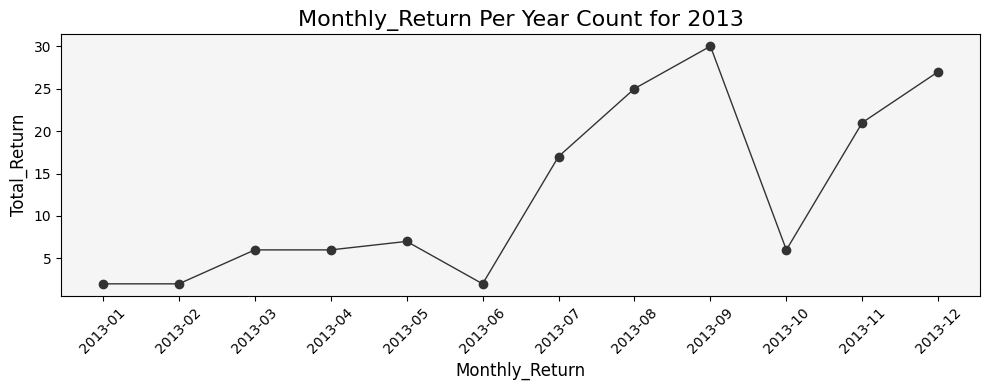

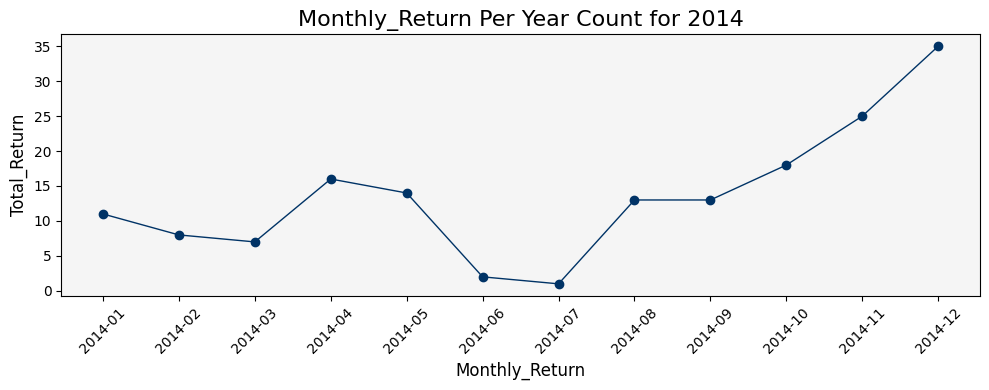

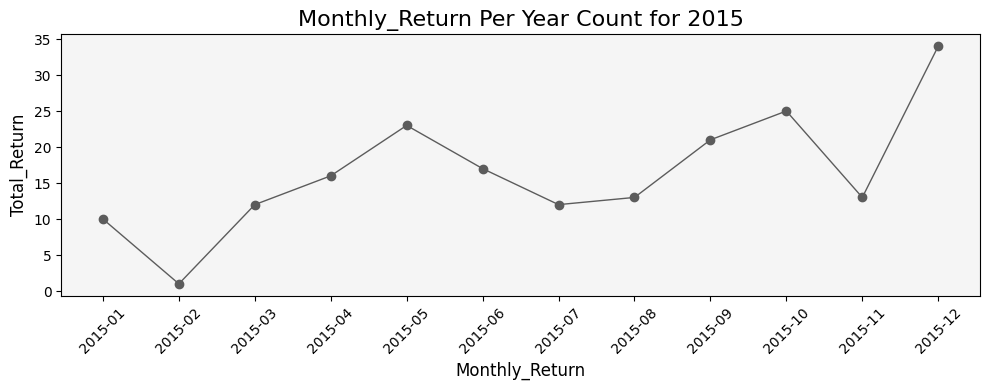

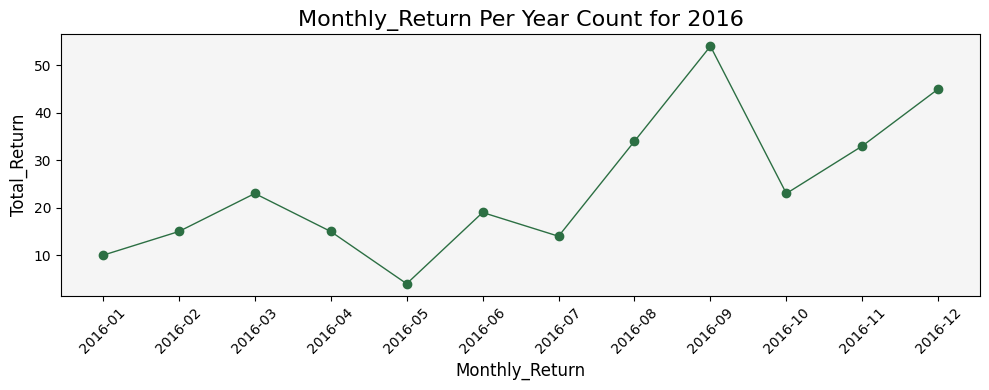

In [31]:
Monthly_Return2013=pd.read_sql_query('''
                    SELECT STRFTIME('%Y-%m', Order_Date) AS Monthly_Return, count(Returned_Items)as Total_Return
                    FROM Store
                    WHERE Returned_Items = 'Returned' and Years = '2013'
                    GROUP BY Monthly_Return
                    ORDER BY Monthly_Return

''',conn)

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Monthly_Return2013['Monthly_Return'], Monthly_Return2013['Total_Return'], marker='o', color='#333333', linestyle='-', linewidth=1)
plt.title('Monthly_Return Per Year Count for 2013', fontsize=16)
plt.xlabel('Monthly_Return', fontsize=12)
plt.ylabel('Total_Return', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

Monthly_Return2014=pd.read_sql_query('''
                    SELECT STRFTIME('%Y-%m', Order_Date) AS Monthly_Return, count(Returned_Items)as Total_Return
                    FROM Store
                    WHERE Returned_Items = 'Returned' and Years = '2014'
                    GROUP BY Monthly_Return
                    ORDER BY Monthly_Return

''',conn)

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Monthly_Return2014['Monthly_Return'], Monthly_Return2014['Total_Return'], marker='o', color='#003366', linestyle='-', linewidth=1)
plt.title('Monthly_Return Per Year Count for 2014', fontsize=16)
plt.xlabel('Monthly_Return', fontsize=12)
plt.ylabel('Total_Return', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()


Monthly_Return2015=pd.read_sql_query('''
                    SELECT STRFTIME('%Y-%m', Order_Date) AS Monthly_Return, count(Returned_Items)as Total_Return
                    FROM Store
                    WHERE Returned_Items = 'Returned' and Years = '2015'
                    GROUP BY Monthly_Return
                    ORDER BY Monthly_Return

''',conn)

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Monthly_Return2015['Monthly_Return'], Monthly_Return2015['Total_Return'], marker='o', color='#5C5C5C', linestyle='-', linewidth=1)
plt.title('Monthly_Return Per Year Count for 2015', fontsize=16)
plt.xlabel('Monthly_Return', fontsize=12)
plt.ylabel('Total_Return', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

Monthly_Return2016=pd.read_sql_query('''
                    SELECT STRFTIME('%Y-%m', Order_Date) AS Monthly_Return, count(Returned_Items)as Total_Return
                    FROM Store
                    WHERE Returned_Items = 'Returned' and Years = '2016'
                    GROUP BY Monthly_Return
                    ORDER BY Monthly_Return

''',conn)

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Monthly_Return2016['Monthly_Return'], Monthly_Return2016['Total_Return'], marker='o', color='#2C6F43', linestyle='-', linewidth=1)
plt.title('Monthly_Return Per Year Count for 2016', fontsize=16)
plt.xlabel('Monthly_Return', fontsize=12)
plt.ylabel('Total_Return', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

#### The most consistent product returns are happening in December itself; we can see that.

---

#### Focusing on December Month Return_Reason

In [32]:
pd.read_sql_query('''
                 SELECT distinct Return_Reason,count(Return_Reason) as Total_Return
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '12' and Returned_Items = 'Returned'
                 GROUP BY Return_Reason
                 order by Total_Return desc

                 ''',conn)

,Return_Reason,Total_Return
0,Product Description Inaccurate,45
1,Product Arrived After Promised Delivery Date,26
2,Incorrect Products Delivered,22
3,Product Ordered Accidently,18
4,Product Damaged,16
5,Customer Dissatified With Product,14


#### There is also need to fix inaccurate product descriptions , lot's of product returned because of this.

----

#### Let's check which sub-category of products are being returned more.

In [33]:
pd.read_sql_query('''
                 SELECT distinct Sub_Category, count(Returned_Items)
                 FROM Store
                 group by Sub_Category
                 order by count(Returned_Items) desc

''',conn)


,Sub_Category,count(Returned_Items)
0,Binders,1522
1,Paper,1370
2,Furnishings,957
3,Phones,889
4,Storage,846
5,Art,796
6,Accessories,775
7,Chairs,617
8,Appliances,462
9,Labels,364


---

#### **Let's find some profitable insights.**

#### Toatal Profit by Year

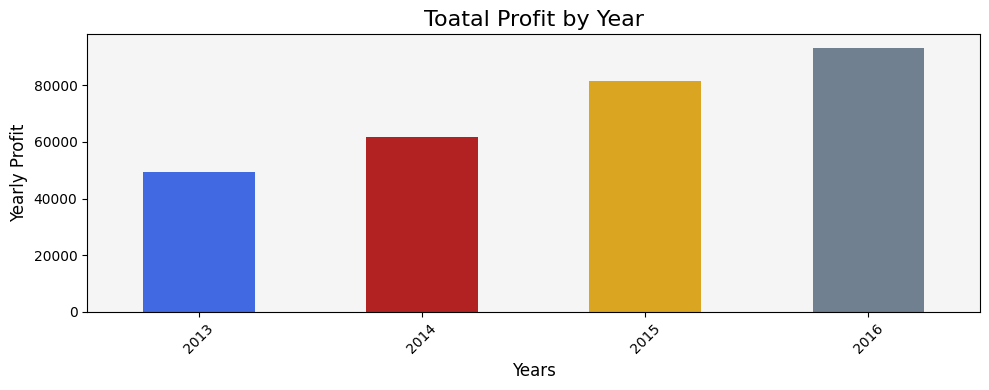

In [34]:
Pofit_by_Year = pd.read_sql_query('''
                     select Distinct Years,sum(Profit) as Yearly_Profit from store
                     group by Years
                     order by Years

''',conn)


fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
colors = ['#4169E1','#B22222','#DAA520','#708090','#008080','#000080','#6B8E23','#BA55D3','#DC143C','#006400','#FF8C00']
Pofit_by_Year.plot(kind='bar', x='Years', y='Yearly_Profit', color=colors, legend=False, ax=plt.gca())
plt.title('Toatal Profit by Year', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Yearly Profit', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

#### Let's check which Category we have.

In [35]:
pd.read_sql_query('''
                     select Distinct Category, count(Sales) from store
                     group by Category
                     order by count(Sales) desc

''',conn)

,Category,count(Sales)
0,Office Supplies,6021
1,Furniture,2121
2,Technology,1847


---

#### Let's check which Sub_Category we have.

In [36]:
pd.read_sql_query('''
                     select Distinct Sub_Category, count(Sales) from store
                     group by Sub_Category
                     order by count(Sales) desc

''',conn)

,Sub_Category,count(Sales)
0,Binders,1522
1,Paper,1370
2,Furnishings,957
3,Phones,889
4,Storage,846
5,Art,796
6,Accessories,775
7,Chairs,617
8,Appliances,462
9,Labels,364


---

#### Total sales by Region

In [37]:
pd.read_sql_query('''
                     select Distinct Region, count(Sales) from store
                     group by Region
                     order by count(Sales) desc

''',conn)

,Region,count(Sales)
0,West,3202
1,East,2847
2,Central,2321
3,South,1619


#### **The highest sales are coming from the West and East Region.**

---

#### Let's see Which category is generating more sales and profit

In [38]:
pd.read_sql_query('''

             SELECT Category, SUM(Sales) AS Total_Sales, SUM(Profit) AS Total_Profit
             FROM Store
             GROUP BY Category
             ORDER BY Total_Sales DESC;

 ''', conn)

,Category,Total_Sales,Total_Profit
0,Technology,836154.0330,145454.9481
1,Furniture,741999.7953,18451.2728
2,Office Supplies,717656.3200,122285.4138


#### We can see Technology category is generating more sales and profit

---

#### Let's check how much sales and profit are coming from customer duration.

In [39]:
pd.read_sql_query('''
                  SELECT Customer_Duration, SUM(Sales) AS Total_Sales, SUM(Profit) AS Total_Profit
                  FROM Store
                  GROUP BY Customer_Duration
                  ORDER BY Customer_Duration DESC;

 ''', conn)

,Customer_Duration,Total_Sales,Total_Profit
0,old customer,2.288298e+06,284385.4672
1,new customer,7.511805e+03,1806.1675


#### We can see most sales and profit are coming from old customer .

---

#### Let's check how much sales and profit are coming from each Region.

In [40]:
pd.read_sql_query('''
                   SELECT Region, SUM(Sales) AS Total_Sales, SUM(Profit) AS Total_Profit
                   FROM Store
                   GROUP BY Region
                   ORDER BY Total_Sales DESC;


 ''', conn)

,Region,Total_Sales,Total_Profit
0,West,725215.8645,108357.9589
1,East,678394.1040,91498.5840
2,Central,500865.4108,39609.8575
3,South,391334.7690,46725.2343


#### Most of sales and profit are coming from West Region.

---

#### Let's see Which Segment is generating more sales and profit

In [41]:
pd.read_sql_query('''
                 SELECT Segment, SUM(Sales) AS Total_Sales, SUM(Profit) AS Total_Profit
                 FROM Store
                 GROUP BY Segment
                 ORDER BY Total_Sales DESC;


 ''', conn)


,Segment,Total_Sales,Total_Profit
0,Consumer,1.160398e+06,133938.0182
1,Corporate,7.057592e+05,91954.9380
2,Home Office,4.296531e+05,60298.6785


#### We can see Consumer Segment is generating most of the sales and profit

---

#### Focusing on Segment Consumer

In [63]:
pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Segment) FROM Store
                 where Segment = 'Consumer'
                 group by Sub_Category
                 order by count(Segment) desc
                 limit 10

''',conn)

,Sub_Category,count(Segment)
0,Binders,779
1,Paper,693
2,Furnishings,494
3,Phones,451
4,Storage,450
5,Art,428
6,Accessories,408
7,Chairs,329
8,Appliances,241
9,Labels,189


#### we can see Top 10 sub_category product in Consumer Segment

---

#### Category we have

In [45]:
pd.read_sql_query('''
                 SELECT distinct Category FROM Store

''',conn)

,Category
0,Office Supplies
1,Furniture
2,Technology


---

#### Focusing on Yearly sales per Month

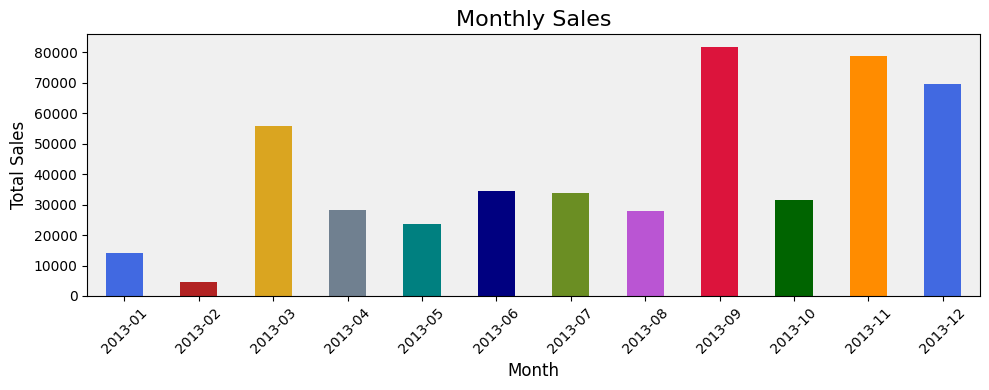

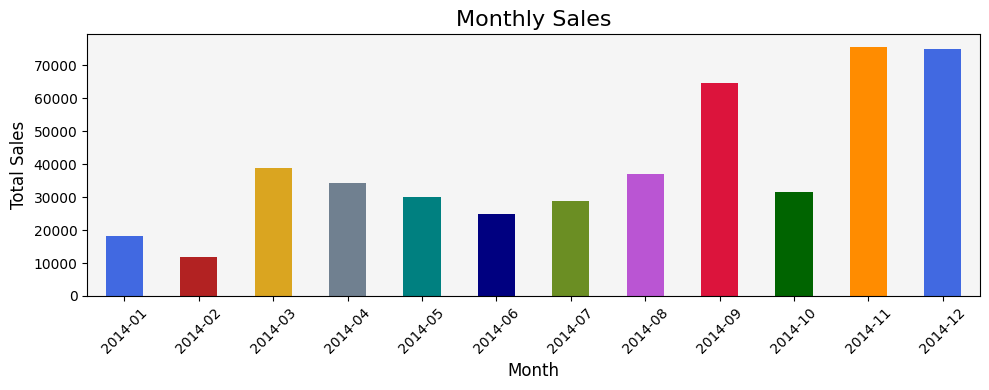

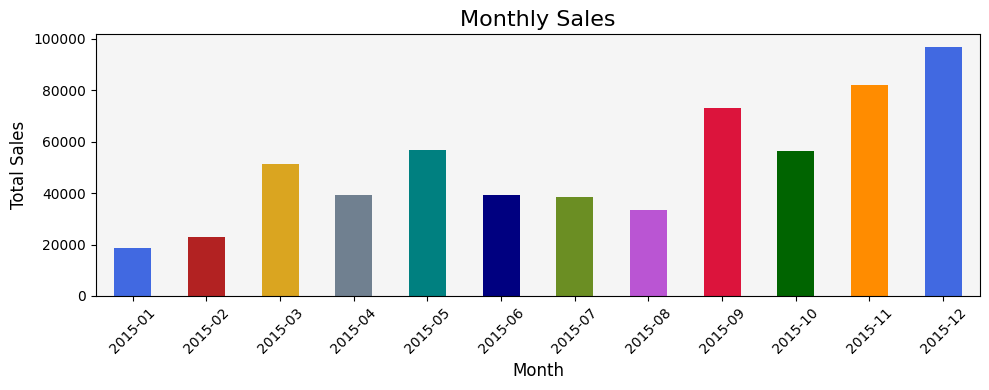

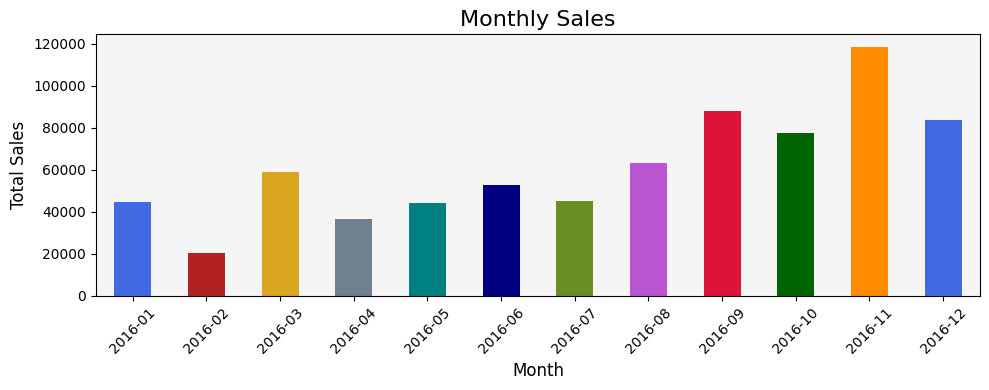

In [49]:
Ts_df2013 = pd.read_sql_query('''
                 SELECT STRFTIME('%Y-%m', Order_Date) AS Month_Sale, SUM(Sales) AS Total_Sales
                 FROM Store
                 WHERE Years = '2013'
                 GROUP BY Month_Sale
                 ORDER BY Month_Sale;

''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('#F0F0F0')
colors = ['#4169E1','#B22222','#DAA520','#708090','#008080','#000080','#6B8E23','#BA55D3','#DC143C','#006400','#FF8C00']
Ts_df2013.plot(kind='bar', x='Month_Sale', y='Total_Sales', color=colors, legend=False, ax=plt.gca())
plt.title('Monthly Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ts_df2014 = pd.read_sql_query('''
                 SELECT STRFTIME('%Y-%m', Order_Date) AS Month_Sale, SUM(Sales) AS Total_Sales
                 FROM Store
                 WHERE Years = '2014'
                 GROUP BY Month_Sale
                 ORDER BY Month_Sale;

''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
colors = ['#4169E1','#B22222','#DAA520','#708090','#008080','#000080','#6B8E23','#BA55D3','#DC143C','#006400','#FF8C00']
Ts_df2014.plot(kind='bar', x='Month_Sale', y='Total_Sales', color=colors, legend=False, ax=plt.gca())
plt.title('Monthly Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ts_df2015 = pd.read_sql_query('''
                 SELECT STRFTIME('%Y-%m', Order_Date) AS Month_Sale, SUM(Sales) AS Total_Sales
                 FROM Store
                 WHERE Years = '2015'
                 GROUP BY Month_Sale
                 ORDER BY Month_Sale;

''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
colors = ['#4169E1','#B22222','#DAA520','#708090','#008080','#000080','#6B8E23','#BA55D3','#DC143C','#006400','#FF8C00']
Ts_df2015.plot(kind='bar', x='Month_Sale', y='Total_Sales', color=colors, legend=False, ax=plt.gca())
plt.title('Monthly Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ts_df2016 = pd.read_sql_query('''
                 SELECT STRFTIME('%Y-%m', Order_Date) AS Month_Sale, SUM(Sales) AS Total_Sales
                 FROM Store
                 WHERE Years = '2016'
                 GROUP BY Month_Sale
                 ORDER BY Month_Sale;

''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
colors = ['#4169E1','#B22222','#DAA520','#708090','#008080','#000080','#6B8E23','#BA55D3','#DC143C','#006400','#FF8C00']
Ts_df2016.plot(kind='bar', x='Month_Sale', y='Total_Sales', color=colors, legend=False, ax=plt.gca())
plt.title('Monthly Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### We can observe that the majority of sales are happening in September, November, and December. And the least sales are happening in February

---

#### Focusing on Month September

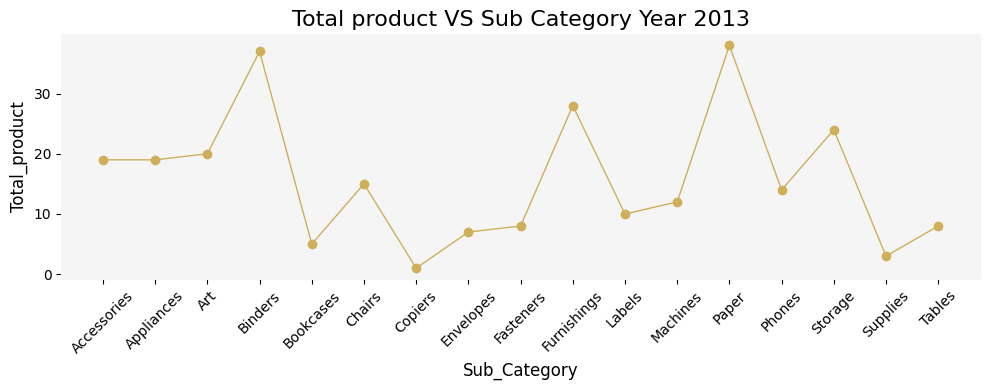

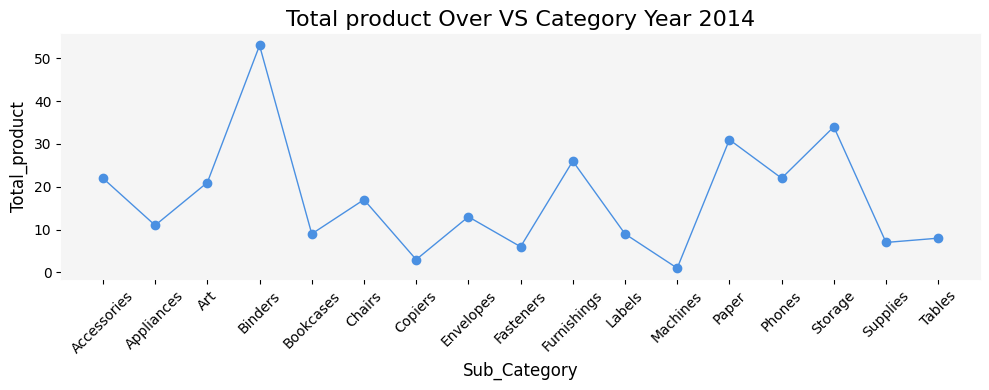

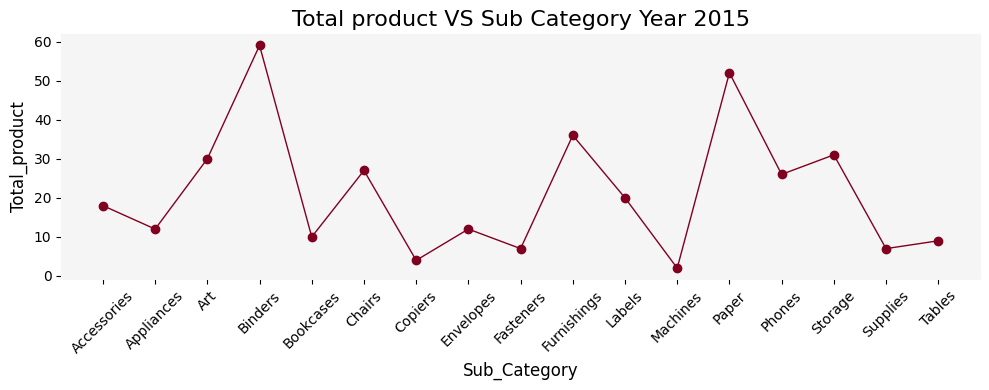

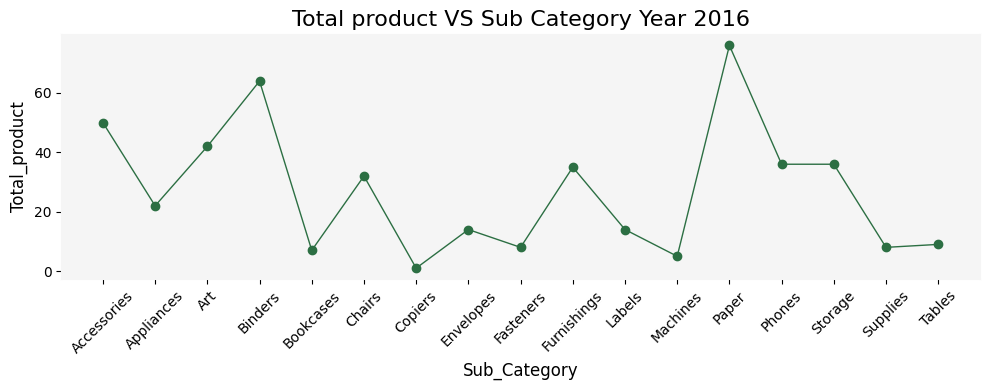

In [66]:
Month_sale2013 = pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Daily_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '09' and Years = '2013'
                 GROUP BY Sub_Category


                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Month_sale2013['Sub_Category'], Month_sale2013['Total_product'], marker='o', color='#CFAF5A', linestyle='-', linewidth=1)
plt.title('Total product VS Sub Category Year 2013', fontsize=16)
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Total_product', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
ax.spines['top'].set_color('whitesmoke')
ax.spines['bottom'].set_color('whitesmoke')
ax.spines['left'].set_color('whitesmoke')
ax.spines['right'].set_color('whitesmoke')
plt.show()


Month_sale2014 = pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Daily_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '09' and Years = '2014'
                 GROUP BY Sub_Category


                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Month_sale2014['Sub_Category'], Month_sale2014['Total_product'], marker='o', color='#4A90E2', linestyle='-', linewidth=1)
plt.title('Total product Over VS Category Year 2014', fontsize=16)
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Total_product', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
ax.spines['top'].set_color('whitesmoke')
ax.spines['bottom'].set_color('whitesmoke')
ax.spines['left'].set_color('whitesmoke')
ax.spines['right'].set_color('whitesmoke')
plt.show()



Month_sale2015 = pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Daily_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '09' and Years = '2015'
                 GROUP BY Sub_Category


                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Month_sale2015['Sub_Category'], Month_sale2015['Total_product'], marker='o', color='#800020', linestyle='-', linewidth=1)
plt.title('Total product VS Sub Category Year 2015', fontsize=16)
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Total_product', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
ax.spines['top'].set_color('whitesmoke')
ax.spines['bottom'].set_color('whitesmoke')
ax.spines['left'].set_color('whitesmoke')
ax.spines['right'].set_color('whitesmoke')
plt.show()



Month_sale2016 = pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Daily_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '09' and Years = '2016'
                 GROUP BY Sub_Category


                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Month_sale2016['Sub_Category'], Month_sale2016['Total_product'], marker='o', color='#2C6F43', linestyle='-', linewidth=1)
plt.title('Total product VS Sub Category Year 2016', fontsize=16)
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Total_product', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
ax.spines['top'].set_color('whitesmoke')
ax.spines['bottom'].set_color('whitesmoke')
ax.spines['left'].set_color('whitesmoke')
ax.spines['right'].set_color('whitesmoke')
plt.show()

#### We can see that Binders and Paper are selling the most in September Month.

---

#### Focusing on Month November

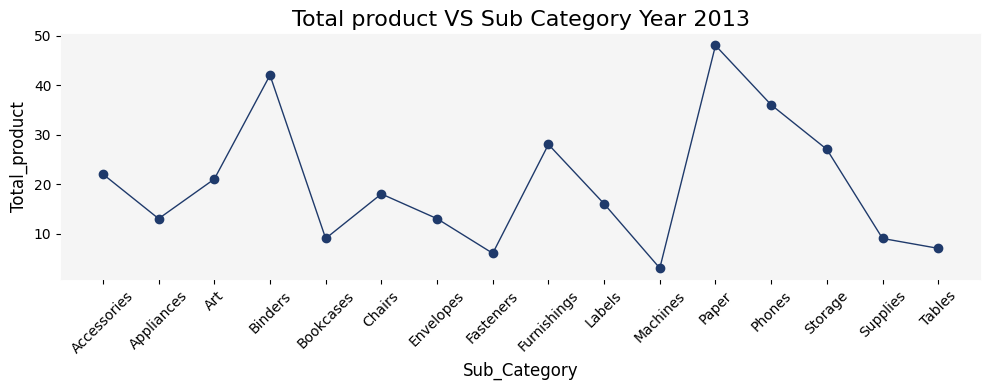

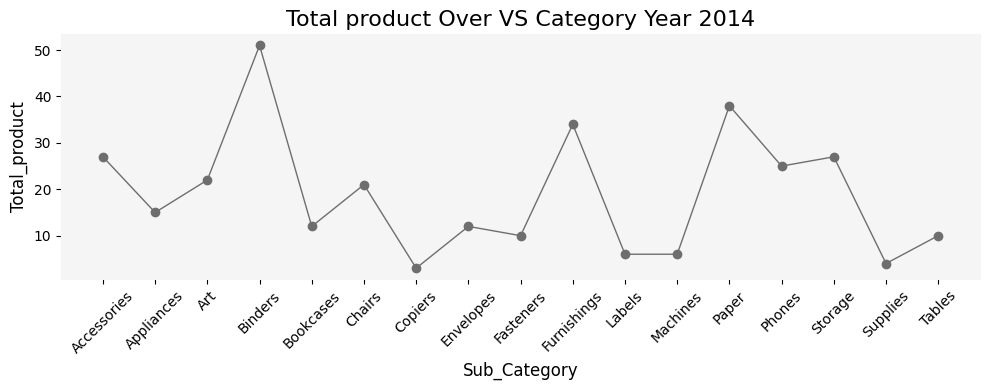

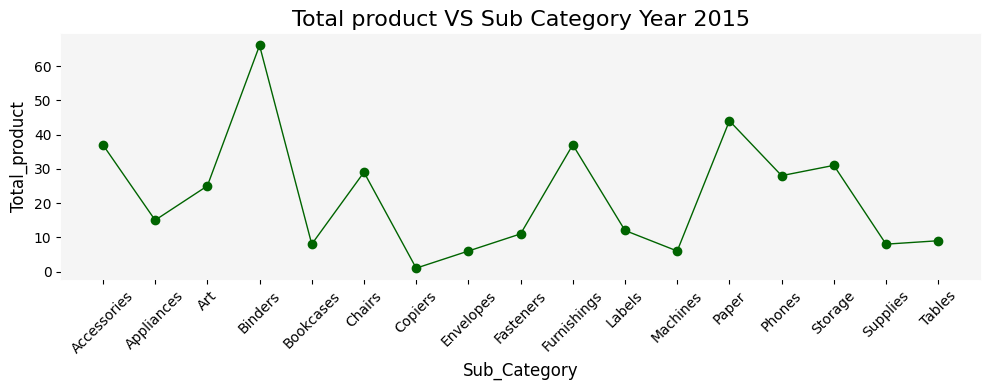

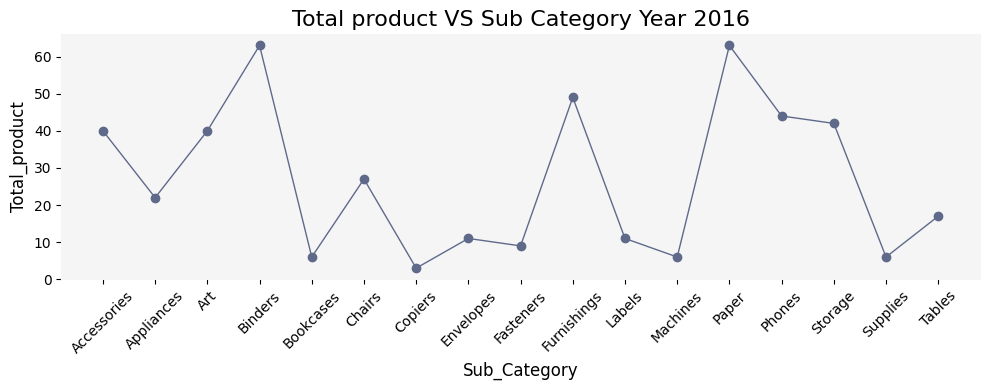

In [69]:
Month_sale2013_11 = pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Daily_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '11' and Years = '2013'
                 GROUP BY Sub_Category


                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Month_sale2013_11['Sub_Category'], Month_sale2013_11['Total_product'], marker='o', color='#1F3A6B', linestyle='-', linewidth=1)
plt.title('Total product VS Sub Category Year 2013', fontsize=16)
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Total_product', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
ax.spines['top'].set_color('whitesmoke')
ax.spines['bottom'].set_color('whitesmoke')
ax.spines['left'].set_color('whitesmoke')
ax.spines['right'].set_color('whitesmoke')
plt.show()


Month_sale2014_11 = pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Daily_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '11' and Years = '2014'
                 GROUP BY Sub_Category


                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Month_sale2014_11['Sub_Category'], Month_sale2014_11['Total_product'], marker='o', color='#6E6E6E', linestyle='-', linewidth=1)
plt.title('Total product Over VS Category Year 2014', fontsize=16)
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Total_product', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
ax.spines['top'].set_color('whitesmoke')
ax.spines['bottom'].set_color('whitesmoke')
ax.spines['left'].set_color('whitesmoke')
ax.spines['right'].set_color('whitesmoke')
plt.show()



Month_sale2015_11 = pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Daily_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '11' and Years = '2015'
                 GROUP BY Sub_Category


                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Month_sale2015_11['Sub_Category'], Month_sale2015_11['Total_product'], marker='o', color='#006400', linestyle='-', linewidth=1)
plt.title('Total product VS Sub Category Year 2015', fontsize=16)
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Total_product', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
ax.spines['top'].set_color('whitesmoke')
ax.spines['bottom'].set_color('whitesmoke')
ax.spines['left'].set_color('whitesmoke')
ax.spines['right'].set_color('whitesmoke')
plt.show()



Month_sale2016_11 = pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Daily_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '11' and Years = '2016'
                 GROUP BY Sub_Category


                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Month_sale2016_11['Sub_Category'], Month_sale2016_11['Total_product'], marker='o', color='#5F6A8B', linestyle='-', linewidth=1)
plt.title('Total product VS Sub Category Year 2016', fontsize=16)
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Total_product', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
ax.spines['top'].set_color('whitesmoke')
ax.spines['bottom'].set_color('whitesmoke')
ax.spines['left'].set_color('whitesmoke')
ax.spines['right'].set_color('whitesmoke')
plt.show()

#### We can see that Binders,Furnishings and Paper are selling the most in November Month.

---

#### Focusing on Month December

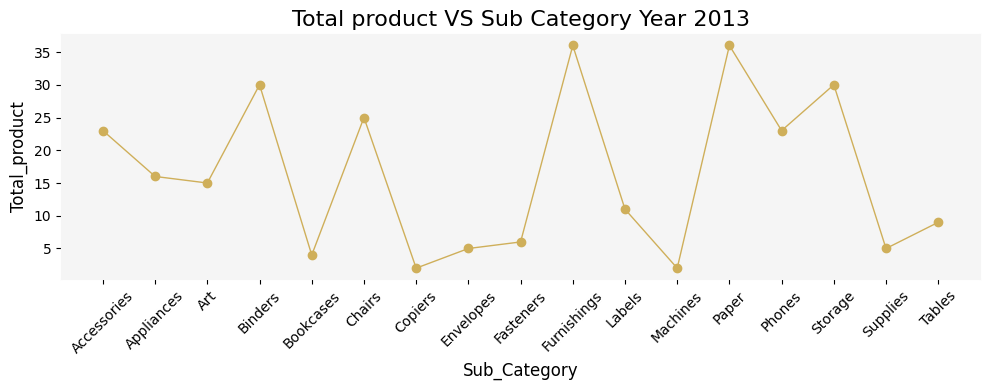

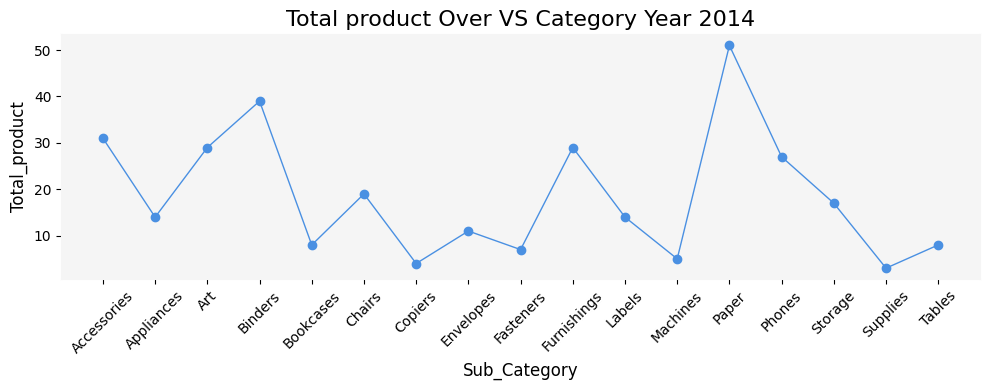

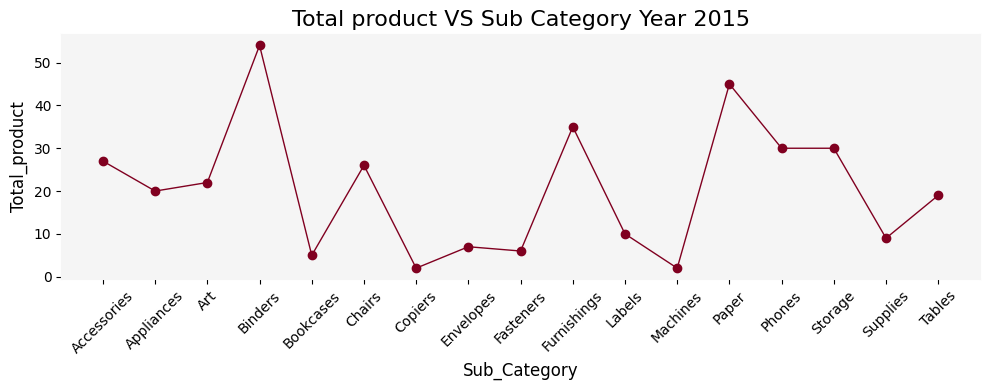

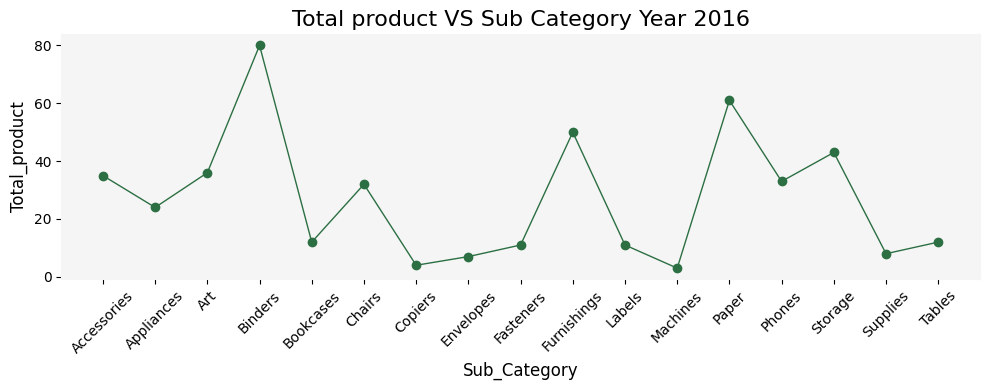

In [68]:
Month_sale2013_12 = pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Daily_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '12' and Years = '2013'
                 GROUP BY Sub_Category


                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Month_sale2013_12['Sub_Category'], Month_sale2013_12['Total_product'], marker='o', color='#CFAF5A', linestyle='-', linewidth=1)
plt.title('Total product VS Sub Category Year 2013', fontsize=16)
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Total_product', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
ax.spines['top'].set_color('whitesmoke')
ax.spines['bottom'].set_color('whitesmoke')
ax.spines['left'].set_color('whitesmoke')
ax.spines['right'].set_color('whitesmoke')
plt.show()


Month_sale2014_12 = pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Daily_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '12' and Years = '2014'
                 GROUP BY Sub_Category


                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Month_sale2014_12['Sub_Category'], Month_sale2014_12['Total_product'], marker='o', color='#4A90E2', linestyle='-', linewidth=1)
plt.title('Total product Over VS Category Year 2014', fontsize=16)
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Total_product', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
ax.spines['top'].set_color('whitesmoke')
ax.spines['bottom'].set_color('whitesmoke')
ax.spines['left'].set_color('whitesmoke')
ax.spines['right'].set_color('whitesmoke')
plt.show()



Month_sale2015_12 = pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Daily_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '12' and Years = '2015'
                 GROUP BY Sub_Category


                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Month_sale2015_12['Sub_Category'], Month_sale2015_12['Total_product'], marker='o', color='#800020', linestyle='-', linewidth=1)
plt.title('Total product VS Sub Category Year 2015', fontsize=16)
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Total_product', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
ax.spines['top'].set_color('whitesmoke')
ax.spines['bottom'].set_color('whitesmoke')
ax.spines['left'].set_color('whitesmoke')
ax.spines['right'].set_color('whitesmoke')
plt.show()



Month_sale2016_12 = pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Daily_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '12' and Years = '2016'
                 GROUP BY Sub_Category


                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
plt.plot(Month_sale2016_12['Sub_Category'], Month_sale2016_12['Total_product'], marker='o', color='#2C6F43', linestyle='-', linewidth=1)
plt.title('Total product VS Sub Category Year 2016', fontsize=16)
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Total_product', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
ax.spines['top'].set_color('whitesmoke')
ax.spines['bottom'].set_color('whitesmoke')
ax.spines['left'].set_color('whitesmoke')
ax.spines['right'].set_color('whitesmoke')
plt.show()

#### We can see that Binders,Furnishings and Paper are selling the most in December Month.

#### **So, we can Conclude that Binders, Furnishings and Paper are in high demand in September,November and Decenber month.**

---

#### Focusing on February month

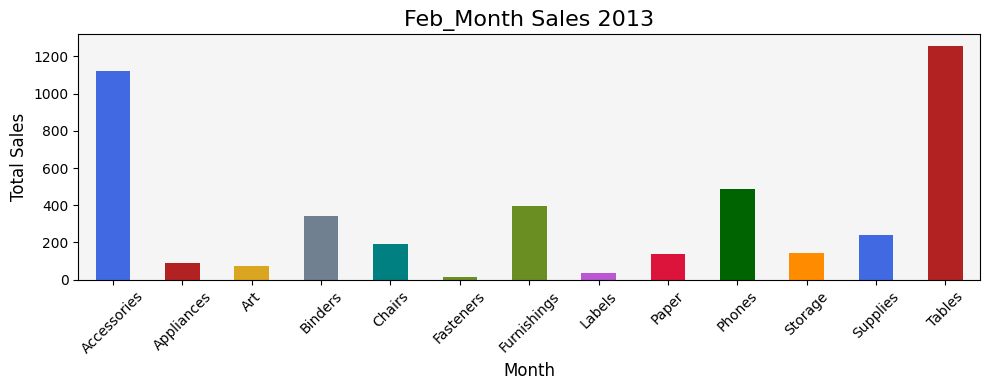

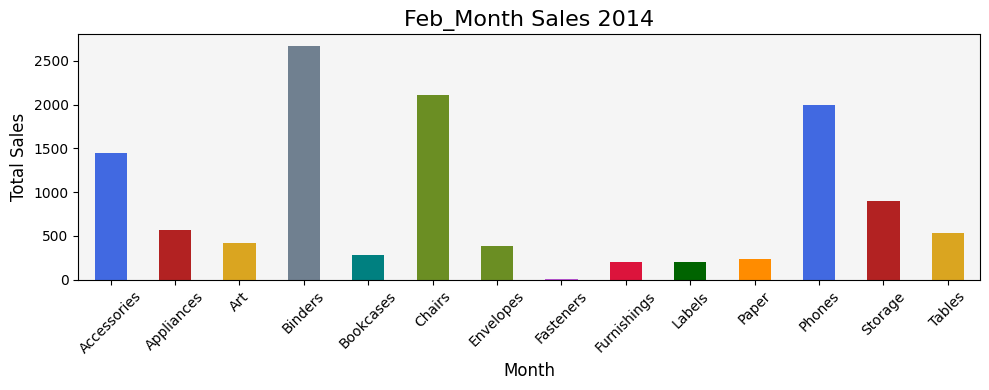

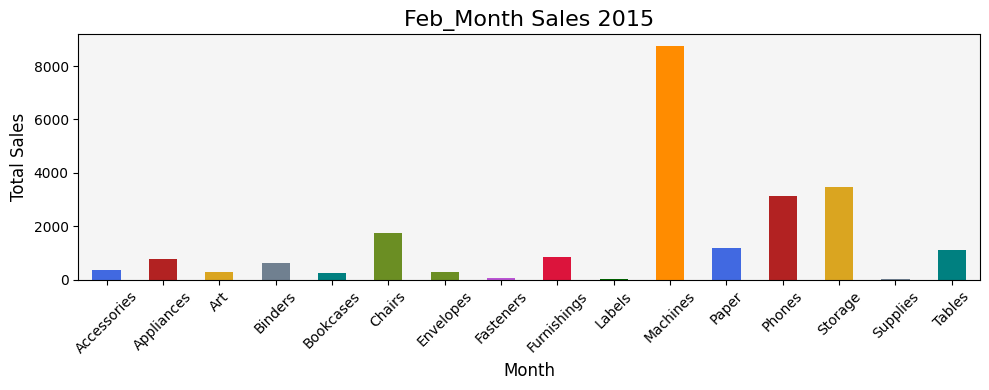

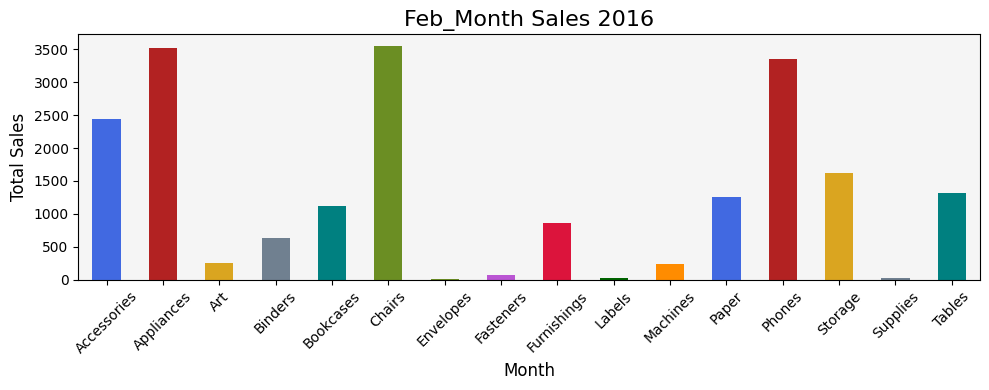

In [72]:
febsale13=pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Total_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '02' and years = '2013'
                 GROUP BY Sub_Category

                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
colors = ['#4169E1','#B22222','#DAA520','#708090','#008080','#6B8E23','#6B8E23','#BA55D3','#DC143C','#006400','#FF8C00','#4169E1','#B22222','#DAA520','#708090','#008080','#6B8E23']
febsale13.plot(kind='bar', x='Sub_Category', y='Total_Sales', color=colors, legend=False, ax=plt.gca())
plt.title('Feb_Month Sales 2013', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

febsale14=pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Total_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '02' and years = '2014'
                 GROUP BY Sub_Category

                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
colors = ['#4169E1','#B22222','#DAA520','#708090','#008080','#6B8E23','#6B8E23','#BA55D3','#DC143C','#006400','#FF8C00','#4169E1','#B22222','#DAA520','#708090','#008080','#6B8E23']
febsale14.plot(kind='bar', x='Sub_Category', y='Total_Sales', color=colors, legend=False, ax=plt.gca())
plt.title('Feb_Month Sales 2014', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

febsale15=pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Total_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '02' and years = '2015'
                 GROUP BY Sub_Category

                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
colors = ['#4169E1','#B22222','#DAA520','#708090','#008080','#6B8E23','#6B8E23','#BA55D3','#DC143C','#006400','#FF8C00','#4169E1','#B22222','#DAA520','#708090','#008080','#6B8E23']
febsale15.plot(kind='bar', x='Sub_Category', y='Total_Sales', color=colors, legend=False, ax=plt.gca())
plt.title('Feb_Month Sales 2015', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



febsale16=pd.read_sql_query('''
                 SELECT distinct Sub_Category,count(Sub_Category) as Total_product,SUM(Sales) AS Total_Sales
                 FROM Store
                 WHERE STRFTIME('%m', Order_Date) = '02' and years = '2016'
                 GROUP BY Sub_Category

                 ''',conn)
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
colors = ['#4169E1','#B22222','#DAA520','#708090','#008080','#6B8E23','#6B8E23','#BA55D3','#DC143C','#006400','#FF8C00','#4169E1','#B22222','#DAA520','#708090','#008080','#6B8E23']
febsale16.plot(kind='bar', x='Sub_Category', y='Total_Sales', color=colors, legend=False, ax=plt.gca())
plt.title('Feb_Month Sales 2016', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### "We can see that Fasteners, Labels, and Supplies have very low sales, almost negligible."

---

#### Focusing on Which Shiping mode are most profitable.

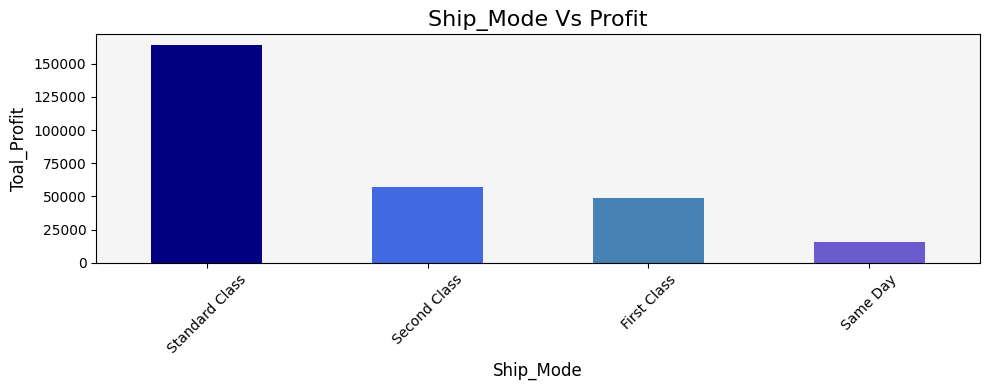

In [51]:
shipMode=pd.read_sql_query('''
                 SELECT distinct Ship_Mode,Sales, SUM(Profit) AS Toal_Profit FROM Store
                 group by Ship_Mode
                 order by Toal_Profit desc


                 ''',conn)

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('whitesmoke')
colors = ['#000080','#4169E1','#4682B4','#6A5ACD']
shipMode.plot(kind='bar', x='Ship_Mode', y='Toal_Profit', color=colors, legend=False, ax=plt.gca())
plt.title('Ship_Mode Vs Profit', fontsize=16)
plt.xlabel('Ship_Mode', fontsize=12)
plt.ylabel('Toal_Profit', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### We can see Standard Class is most profitable for us.

---

## **Project Summary -**

#### The objective of this project is to analyze and enhance key aspects of our business performance, focusing on optimizing revenue, customer satisfaction, operational efficiency, and product development. Our analysis has identified that sales peak in September, November, and December, while sales are considerably lower in February. This insight provides a foundation to explore seasonal trends and customer behavior.



####**Store Data Analysis Summary**


##### **To address the issues like "Product Description Inaccurate," "Product Arrived After Promised Delivery Date," "Incorrect Products Delivered," "Product Ordered Accidentally," "Product Damaged," and "Customer Dissatisfied With Product" . Here are some potential solutions and actions to take based on data:**

1. **Product Description Inaccurate Solution :**
Regularly audit product descriptions in database, cross-referencing them with actual product details to ensure accuracy.
Enhance product data quality by including clear, detailed, and up-to-date descriptions for each Product_ID, Category, and Sub_Category.
Implement a system to flag and review descriptions that are inconsistent or frequently lead to returns or customer dissatisfaction (based on Return_Reason or Customer_Feedback).
Actions:
Create a process to update product descriptions based on customer feedback (especially in Return_Reason fields).
Include images and accurate specifications for each product to align with customer expectations.


2. **Product Arrived After Promised Delivery Date Solution :**
Analyze Ship_Date and Order_Date to detect delays in the shipping process and find bottlenecks in logistics chain.
Ensure that Ship_Mode is aligned with the delivery promises, and monitor performance regularly to improve delivery timelines.
Actions:
Track and optimize the Ship_Mode options to ensure they match the delivery promises made to customers.
Implement better shipping management tools to minimize delays, with a focus on high-demand periods, ensuring products reach customers on time.


3. **Incorrect Products Delivered Solution :**

Introduce a quality control or verification step in order fulfillment process.
Use Order_ID and Product_ID to match the ordered items to the correct shipment.
Implement barcode scanning or automated inventory management systems to reduce human error in packing.
Actions:

Conduct regular checks to ensure the Product_ID and Order_ID match before shipping.
Implement a system to track errors in deliveries and tie them back to specific warehouse locations, staff members, or inventory issues.


4. **Product Ordered Accidentally Solution :**

Identify common patterns in accidental orders (e.g., high frequency of returns or specific product categories) using Return_Reason data.
Provide clearer product descriptions and user-friendly interface designs for easier navigation on your platform.
Implement better filtering and confirmation steps during checkout to ensure customers are ordering the correct items.
Actions:

Use Customer_ID and Order_Date to track accidental orders and implement a more intuitive order confirmation process.
Offer post-purchase order modification or a more seamless return process for accidental orders to improve customer satisfaction.


5. **Product Damaged Solution** :

Monitor and analyze Return_Reason data to track products that are frequently reported as damaged.
Improve packaging and handling procedures for sensitive items.
Identify and address specific product categories or suppliers that have higher rates of damage.
Actions:

Review and improve packaging methods based on the Product_Category or Sub_Category.
Work with suppliers to ensure products are well-constructed and packed securely for shipping.
Track damaged product reports in your database and implement corrective actions, such as switching suppliers or adjusting packing materials.


6. **Customer Dissatisfied With Product Solution:**

Use Customer_ID, Return_Reason, and Product_ID data to identify trends in dissatisfaction, such as common complaints related to quality or features.
Implement a customer feedback loop by offering surveys post-purchase or after a return to understand the causes of dissatisfaction.
Actions:

Analyze Sales, Profit, and Return_Reason data to determine which products have the highest dissatisfaction rates.
Provide better product education or instructional guides (e.g., how-to-use information) to reduce confusion about product use.
Focus on improving product quality and customer service based on common reasons for dissatisfaction and negative feedback.
General Approach to Integrate Solutions:
Create Data Dashboards: Develop visual dashboards to track key performance metrics like returns, damaged products, delivery delays, and customer satisfaction. Use Order_ID, Return_Reason, and Product_ID to segment issues by product type, region, or customer demographic.

Enhance Customer Support: Add a customer feedback loop to your platform (like a survey post-purchase or after returns) and analyze the Return_Reason field to gain actionable insights for continuous improvement.


---

---